<a href="https://colab.research.google.com/github/ag-wnl/pypy/blob/main/pytorch_tut1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [6]:
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16322439.22it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 300443.85it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5550958.63it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11424485.18it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [8]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

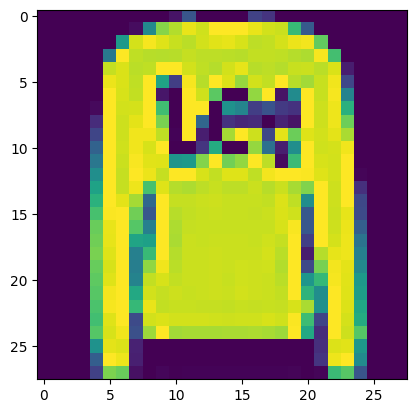

In [58]:
plt.imshow(test_data[1][0][0])

####Loading Datasets

In [12]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader:
  print(f"X dimensions: {X.shape}")
  print(f"y dimensions: {y.shape}")
  break

X dimensions: torch.Size([64, 1, 28, 28])
y dimensions: torch.Size([64])


##Defining Model

In [14]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"using device: {device}")

using device: cpu


In [29]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(in_features = 28*28, out_features = 512),
        nn.ReLU(),
        nn.Linear(in_features = 512, out_features = 512),
        nn.ReLU(),
        nn.Linear(in_features = 512, out_features = 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [35]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 1e-3)

###Training our Model

In [36]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    pred = model(X)
    loss = loss_fn(pred, y)

    #backprop
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch%100 == 0:
      loss, current = loss.item(), (batch+1)*len(X)
      print(f"Current Loss: {loss} [{current} / {size}]")

In [37]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

##Testing our Model

In [38]:
epochs = 5

for i in range(epochs):
  print(f"Epoch {i+1}\n-------------------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)

print("Completed Successfully-!")

Epoch 1
-------------------------------
Current Loss: 1.1426804065704346 [64 / 60000]
Current Loss: 0.5463211536407471 [6464 / 60000]
Current Loss: 0.3932083547115326 [12864 / 60000]
Current Loss: 0.5059975385665894 [19264 / 60000]
Current Loss: 0.46293219923973083 [25664 / 60000]
Current Loss: 0.4225388169288635 [32064 / 60000]
Current Loss: 0.37109237909317017 [38464 / 60000]
Current Loss: 0.5224191546440125 [44864 / 60000]
Current Loss: 0.4935988783836365 [51264 / 60000]
Current Loss: 0.5067471265792847 [57664 / 60000]
Test Error: 
 Accuracy: 84.5%, Avg loss: 0.423053 

Epoch 2
-------------------------------
Current Loss: 0.28076159954071045 [64 / 60000]
Current Loss: 0.34526583552360535 [6464 / 60000]
Current Loss: 0.279508113861084 [12864 / 60000]
Current Loss: 0.37505507469177246 [19264 / 60000]
Current Loss: 0.4330964684486389 [25664 / 60000]
Current Loss: 0.3615266680717468 [32064 / 60000]
Current Loss: 0.3151501417160034 [38464 / 60000]
Current Loss: 0.49417614936828613 [4486

Testing our Model

In [59]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
